In [18]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv',encoding='latin-1')
print(df.head(10))
print(df.columns)
print(df.info())

  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                         director  \
0                 Kirsten Johnson   
1                             NaN   
2                 Julien Leclercq   
3                             NaN   
4                             NaN   
5                   Mike Flanagan   
6  Robert Cullen, JosÃ© Luis Ucha   
7                    Haile Gerima   
8                 Andy Devonshire   
9            

In [19]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] #removes the columns which are named as unnamed
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [20]:
# checking the missing values
# print(df.isnull().sum())
# found in directors,cast,country,date_added,rating,duration there are null values
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)
df['date_added'].fillna('Unknown',inplace=True)
df['rating'].fillna('Unknown',inplace=True)
df['duration'].fillna('Unknown',inplace=True)
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


C:\Users\lalit\AppData\Local\Temp\ipykernel_44868\2919601594.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown',inplace=True)
C:\Users\lalit\AppData\Local\Temp\ipykernel_44868\2919601594.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [21]:
# Checking for duplicates
# print(df.duplicated().sum()) # output: 0 there are no duplicates
df.drop_duplicates(inplace=True)# by chance if you get later in other files
print(df.duplicated().sum())

0


In [22]:
# correcting the datatypes
print(df.dtypes) # all will be in objects

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [23]:
df["show_id"] = df["show_id"].astype("string")
df["type"]=df["type"].astype("string")
df["title"]=df["title"].astype("string")
df["director"]=df["director"].astype("string")
df["cast"]=df["cast"].astype("string")
df["country"]=df["country"].astype("string")
df["date_added"]=df["date_added"].astype("string")
df["release_year"]=df["release_year"].astype("int64")
df["rating"]=df["rating"].astype("string")
df["duration"]=df["duration"].astype("string")
df["listed_in"]=df["listed_in"].astype("string")
df["description"]=df["description"].astype("string")
print(df.dtypes)

show_id         string[python]
type            string[python]
title           string[python]
director        string[python]
cast            string[python]
country         string[python]
date_added      string[python]
release_year             int64
rating          string[python]
duration        string[python]
listed_in       string[python]
description     string[python]
dtype: object


type
Movie      6132
TV Show    2677
Name: count, dtype: Int64


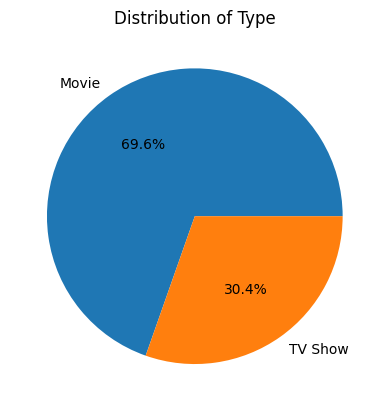

In [24]:
type_counts=df["type"].value_counts()# comparing ratio between TV shows and Movies
print(type_counts)
import matplotlib.pyplot as plt
plt.pie(type_counts,labels=type_counts.index,autopct='%1.1f%%')
plt.title("Distribution of Type")
plt.show()

The Minimum release year : 1925
The Maximum release year: 2024
8809


C:\Users\lalit\AppData\Local\Temp\ipykernel_44868\1070392310.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([pd.cut(df['release_year'], bins=bins), 'type'])['show_id'].count().unstack()


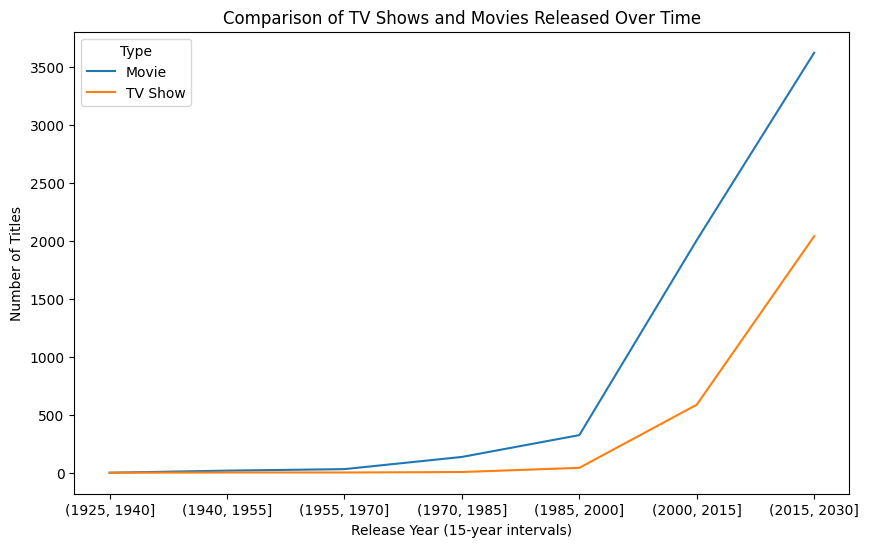

In [25]:
min_year=df["release_year"].min()
max_year=df["release_year"].max()
print("The Minimum release year :",min_year)
print("The Maximum release year:",max_year)
print(df["show_id"].count())
bins = range(df['release_year'].min(), df['release_year'].max() + 16, 15)
grouped = df.groupby([pd.cut(df['release_year'], bins=bins), 'type'])['show_id'].count().unstack()

grouped.plot(kind='line', figsize=(10, 6))
plt.xlabel('Release Year (15-year intervals)')
plt.ylabel('Number of Titles')
plt.title('Comparison of TV Shows and Movies Released Over Time')
plt.legend(title='Type')
plt.show()

In [27]:
year_with_most_content = df['release_year'].value_counts().idxmax()
print("The year with the most Netflix content is:", year_with_most_content)

The year with the most Netflix content is: 2018


release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2018    1147
2019    1030
2020     953
2021     592
2024       1
Name: count, Length: 75, dtype: int64


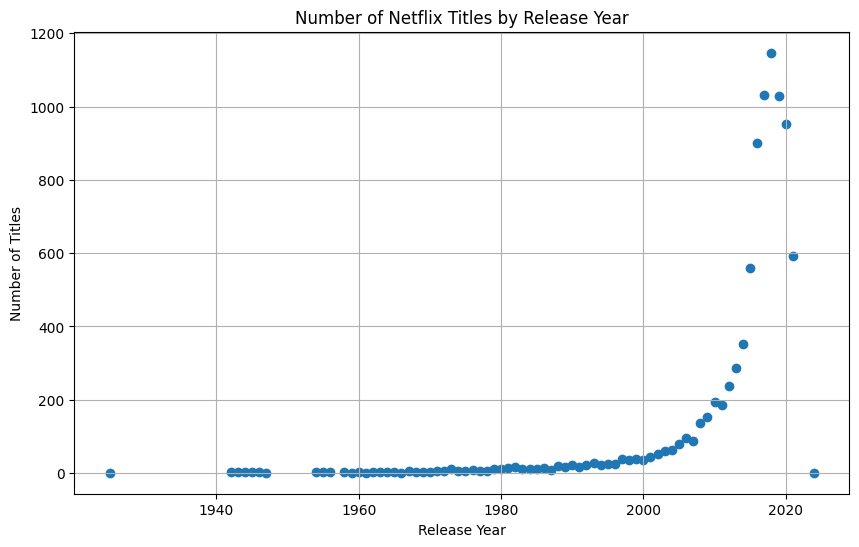

In [28]:
#content counts per year
content_counts = df['release_year'].value_counts().sort_index()
print(content_counts)
plt.figure(figsize=(10, 6))
plt.scatter(content_counts.index, content_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Netflix Titles by Release Year')
plt.grid(True)
plt.show()

The number of countries contributing to Netflix is: 748
                          Country  Number of Contributions
0                   United States                     2819
1                           India                      972
2                  United Kingdom                      419
3                           Japan                      245
4                     South Korea                      200
5                          Canada                      181
6                           Spain                      145
7                          France                      124
8                          Mexico                      110
9                           Egypt                      106
10                         Turkey                      105
11                        Nigeria                       95
12                      Australia                       87
13                         Taiwan                       81
14                      Indonesia                       79


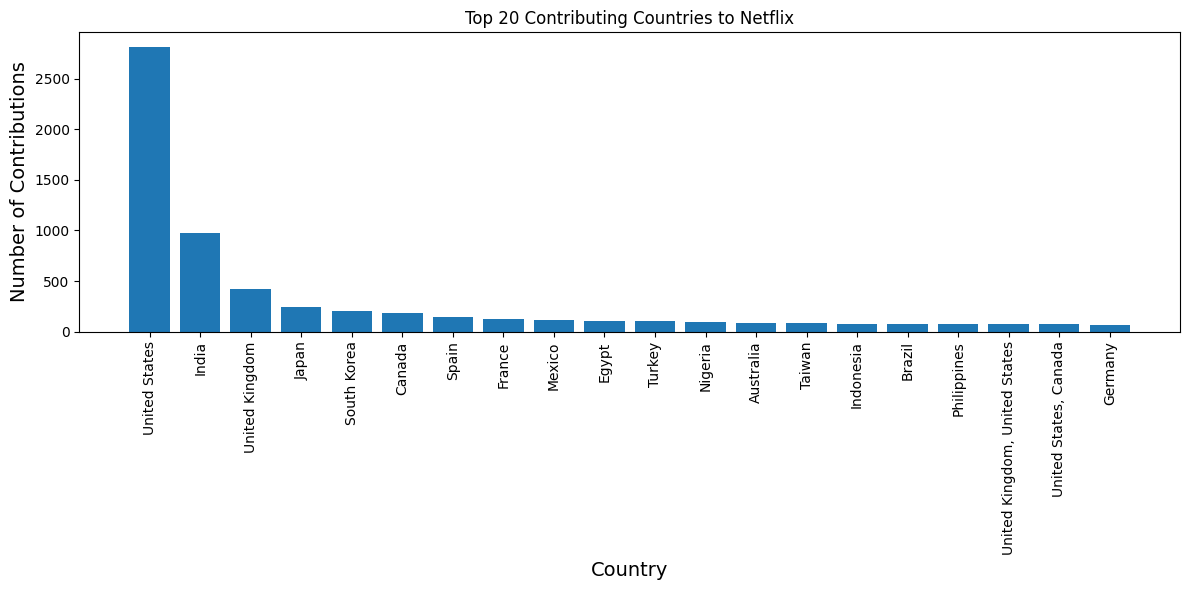

In [31]:

# Filter out 'Unknown' countries
df_known_countries = df[df['country'] != 'Unknown']

# Calculate number of unique known countries
num_known_countries = df_known_countries['country'].nunique()
print("The number of countries contributing to Netflix is:", num_known_countries)

# Calculate top 20 known contributing countries
top_20_countries = df_known_countries['country'].value_counts().head(20).reset_index()
top_20_countries.columns = ['Country', 'Number of Contributions']
print(top_20_countries)
plt.figure(figsize=(12, 6))
plt.bar(top_20_countries['Country'], top_20_countries['Number of Contributions'])
plt.xlabel('Country', fontsize=14)  # Increased font size for x-axis label
plt.ylabel('Number of Contributions', fontsize=14)  # Increased font size for y-axis label
plt.title('Top 20 Contributing Countries to Netflix')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico', 'Egypt'],
      dtype='string', name='country')
type            Movie  TV Show
country                       
United States    2059      760
India             893       79
United Kingdom    206      213
Canada            122       59
Spain              97       48
Egypt              92       14
Japan              76      169
France             75       49
Mexico             70       40
South Korea        41      159


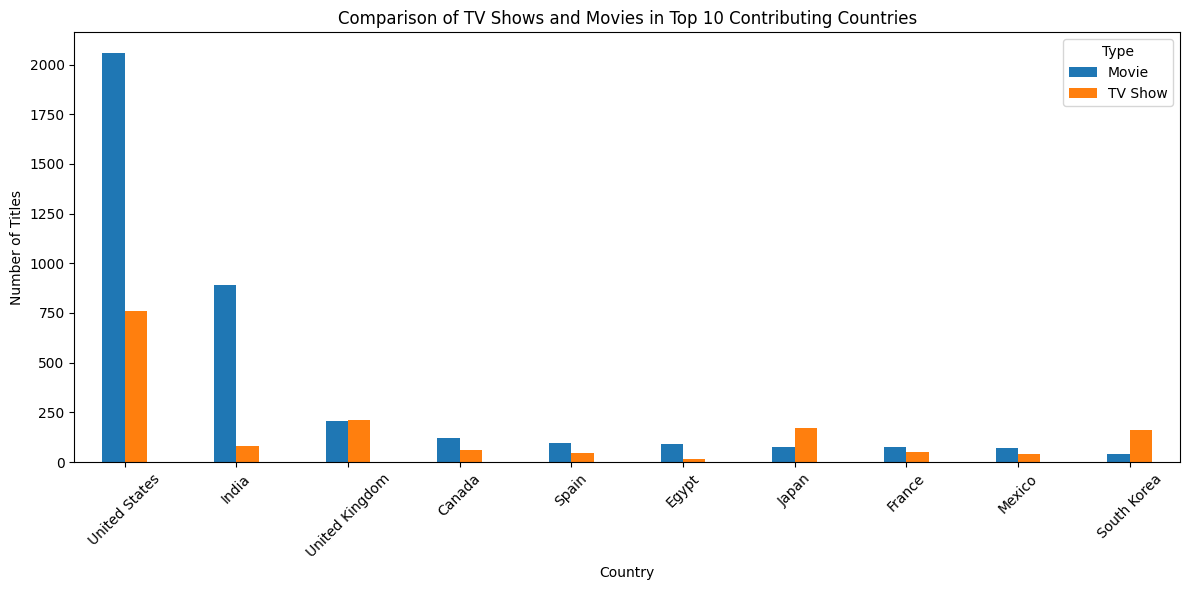

In [33]:
# Top 10 countries contributions in TV shows and movies
df_known_countries = df[df['country'] != 'Unknown']

# Get top 10 known countries
top_10_countries = df_known_countries['country'].value_counts().head(10).index
print(top_10_countries)

filtered_df = df[df['country'].isin(top_10_countries)]
grouped = filtered_df.groupby(['country', 'type'])['show_id'].count().unstack().sort_values(by='Movie', ascending=False)
print(grouped)
grouped.plot(kind='bar', figsize=(12, 6), position=0.5, width=0.4)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Comparison of TV Shows and Movies in Top 10 Contributing Countries')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()